# Unsupervised Machine Learning

## Task - predict the optimum number of clusters and represent it visually.

### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

### Reading data

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()
x=df.iloc[:, [0, 1, 2, 3]].values


### Finding the total number of cluster using Elbow Method

In [3]:
from sklearn.cluster import KMeans

k_values=range(1,10)

k_means_mods=[KMeans(n_clusters=i) for i in k_values]
scores=[-k_means_mods[i].fit(df).score(df) for i,model in enumerate(k_means_mods)]


Text(0, 0.5, 'Scores')

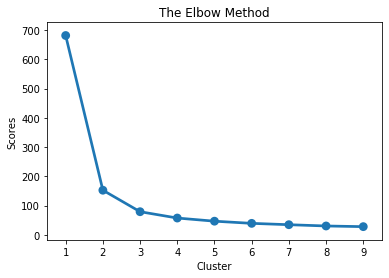

In [4]:
sns.pointplot(x=list(k_values),y=scores)
plt.title('The Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('Scores')

### From the figure it is clearly stated that no of cluster would be 3.

In [5]:
kmeans=KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(df)

In [6]:
len(y_kmeans)

150

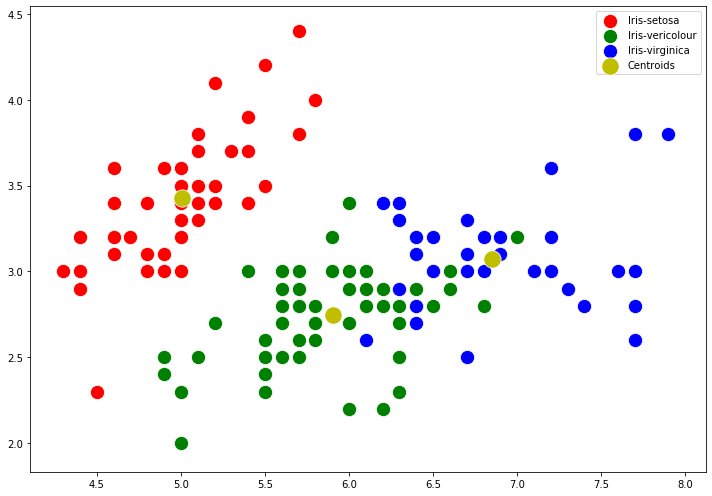

In [7]:
plt.figure(figsize=(10,7))
sns.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=200,color='r',label="Iris-setosa")
sns.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s=200,color='g',label="Iris-vericolour")
sns.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s=200,color='b',label="Iris-virginica")
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,color="y",label="Centroids")
plt.legend(loc="best")
plt.tight_layout()
